In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\New folder\final_load_weather_data.csv")
df.head()


,ds,y,forecast_load,Unnamed: 0,dt,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
0,2015-01-01 01:00:00+00:00,26118.0,25385.0,11075,2015-01-01 02:00:00,2509954,269.686000,269.686000,269.686000,1002,78,0,23,0.0,0.0,0.0,0,800
1,2015-01-01 01:00:00+00:00,26118.0,25385.0,63228,2015-01-01 02:00:00,3117735,266.186000,266.186000,266.186000,971,64,1,273,0.0,0.0,0.0,0,800
2,2015-01-01 01:00:00+00:00,26118.0,25385.0,116333,2015-01-01 02:00:00,3128026,269.251688,269.251688,269.251688,1036,97,1,224,0.0,0.0,0.0,0,800
3,2015-01-01 01:00:00+00:00,26118.0,25385.0,169280,2015-01-01 02:00:00,3128760,281.286000,281.286000,281.286000,1036,100,7,48,0.0,0.0,0.0,0,800
4,2015-01-01 01:00:00+00:00,26118.0,25385.0,221705,2015-01-01 02:00:00,6361046,274.086000,274.086000,274.086000,1039,71,3,27,0.0,0.0,0.0,0,800


In [4]:
from prophet import Prophet
import pandas as pd

# Prophet needs only 'ds' and 'y'
prophet_df = df[['ds', 'y']].copy()

In [6]:
# First, convert to datetime (if not already)
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], errors='coerce')

# Then remove timezone (if any)
prophet_df['ds'] = prophet_df['ds'].dt.tz_localize(None)


12:15:24 - cmdstanpy - INFO - Chain [1] start processing
12:17:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ASUS\OneDrive\Desktop\New folder\.venv\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


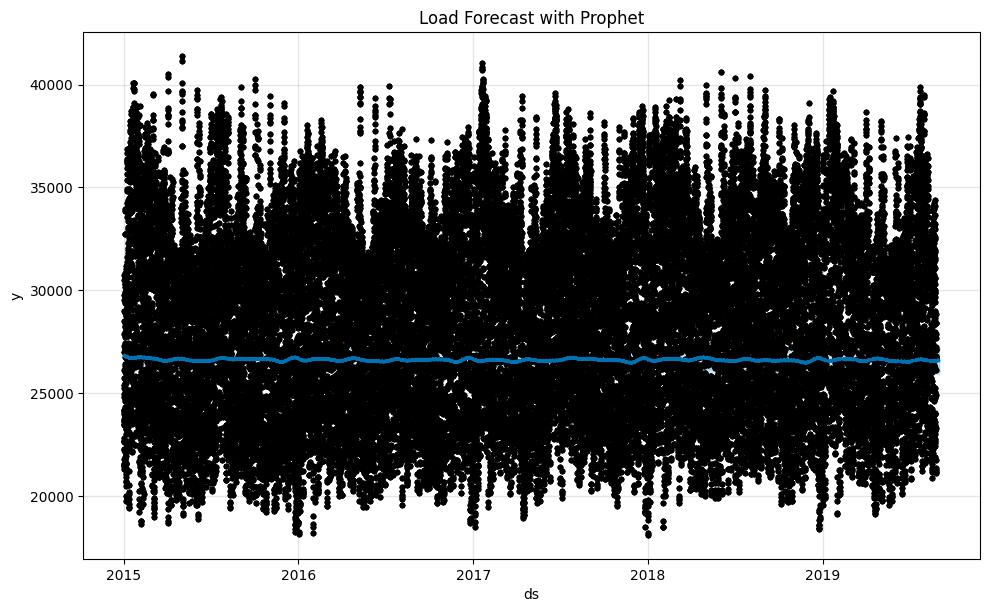

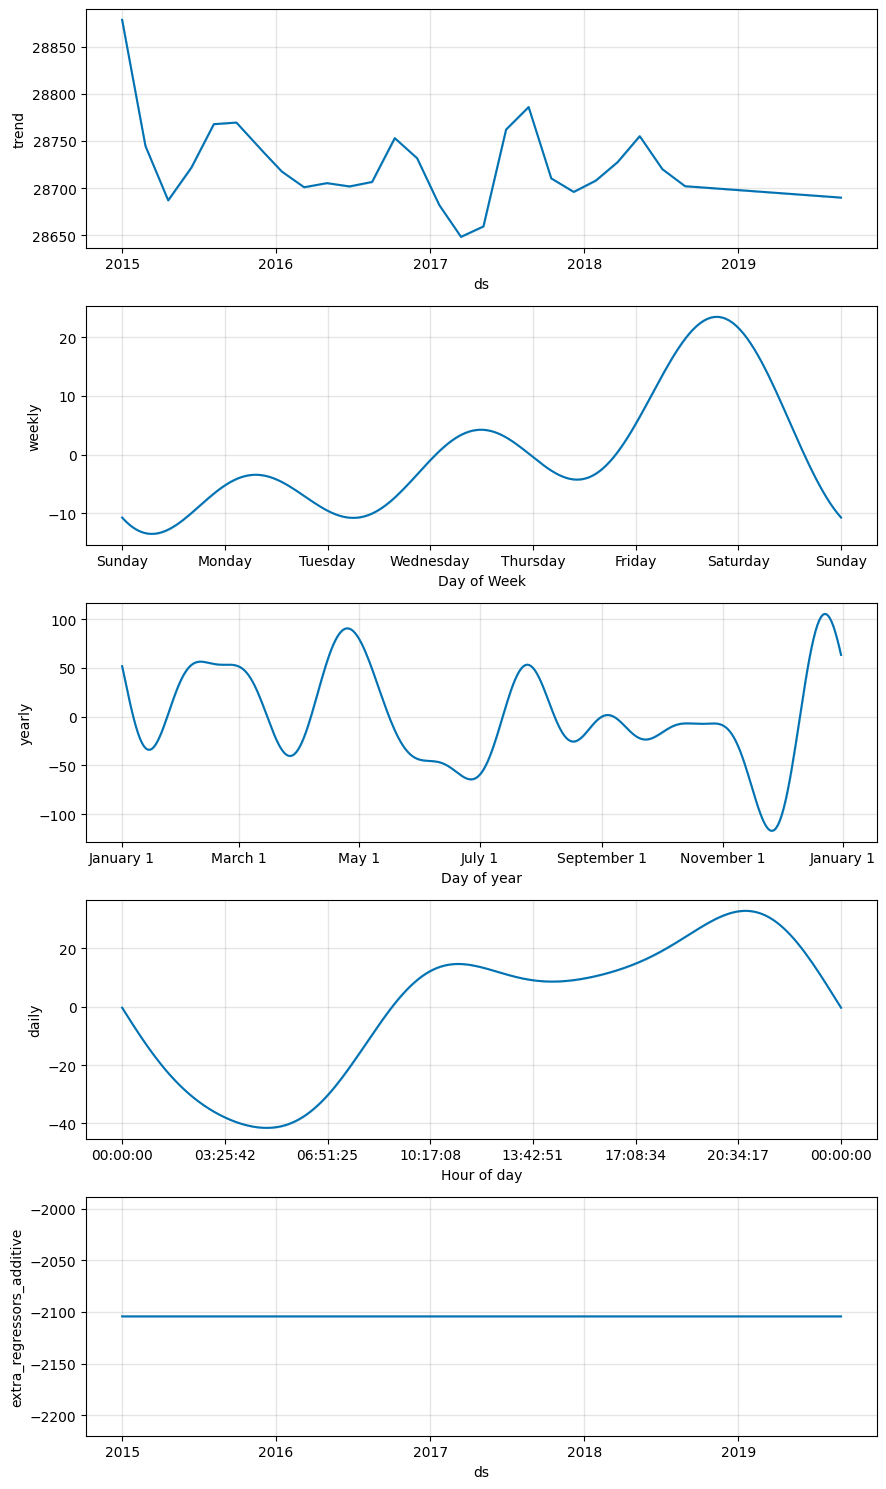

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Ensure 'ds' is in datetime format and remove timezone
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df['ds'] = df['ds'].dt.tz_localize(None)  # This will now work

# Step 2: Select useful external regressors
regressors = ['temp', 'humidity', 'forecast_load']

# Step 3: Prepare Prophet dataframe
prophet_df = df[['ds', 'y'] + regressors].copy()

# Step 4: Initialize Prophet model and add regressors
model = Prophet()
for reg in regressors:
    model.add_regressor(reg)

# Step 5: Fit model
model.fit(prophet_df)

# Step 6: Create future dataframe for 1 week
future = model.make_future_dataframe(periods=168, freq='H')

# Step 7: Add future regressor values (repeat last known values)
for reg in regressors:
    future[reg] = prophet_df[reg].iloc[-1]

# Step 8: Forecast
forecast = model.predict(future)

# Step 9: Plot forecast
model.plot(forecast)
plt.title('Load Forecast with Prophet')
plt.show()

# Step 10: Plot components (trends, seasonality)
model.plot_components(forecast)
plt.show()


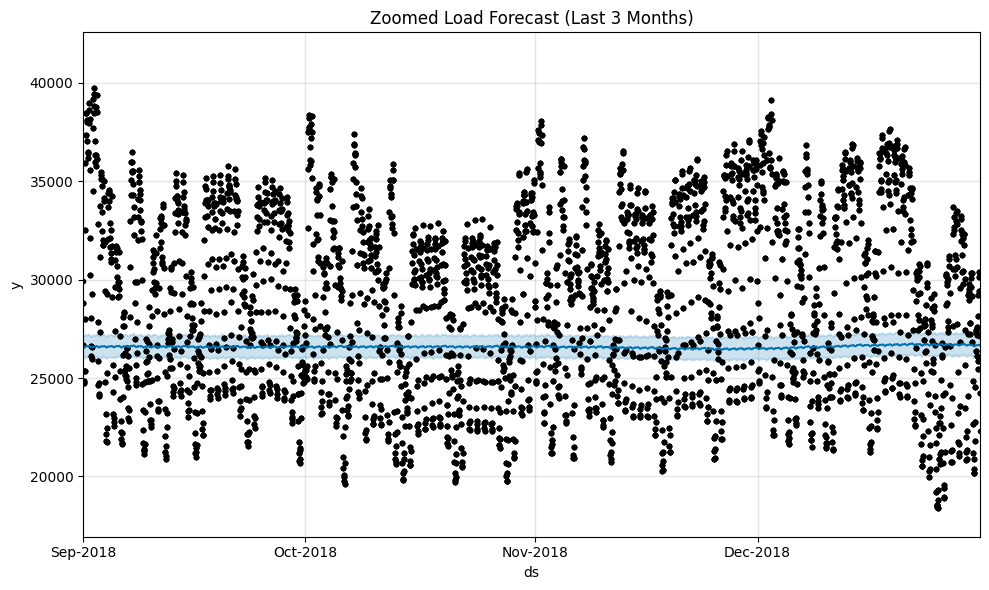

In [10]:
# Zoom in to last 3 months of data
import matplotlib.dates as mdates

fig = model.plot(forecast)
plt.title("Zoomed Load Forecast (Last 3 Months)")
plt.xlim(pd.Timestamp("2018-09-01"), pd.Timestamp("2018-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid(True)
plt.tight_layout()
plt.show()
